# Import Libraries

In [957]:
#pandas for data manipuation
import pandas as pd

# Make pandas display all the rows instead of truncate
pd.set_option('display.max_rows', None)

# Turn off iscopy warnings
pd.options.mode.chained_assignment = None

#matplotlib for data visualization; functions on pyplot
import matplotlib.pyplot as plt

#display graphs inine
%matplotlib inline
matplotlib.style.use('ggplot')

# Data Ingestion

In [958]:
# Import the course data
courses_df = pd.read_csv('data/courses.csv')

#review first few records to verify import
courses_df.head()

,courseId,categories
0,72,AWS|Security
1,2,AWS|Cloud|Serverless|Operations
2,0,AWS|Cloud|Serverless
3,49,GCP|ML|AI
4,1,AWS|Cloud|Python|Programming


In [959]:
courses_df.shape

(75, 2)

In [960]:
#Import the student data
students_df = pd.read_csv('data/students.csv')
students_df.head()

,studentId,courseId,progress
0,61,72,11%
1,71,73,14%
2,4,2,10%
3,16,3,2%
4,40,4,5%


In [961]:
students_df.shape

(1849, 3)

# Data Preparation

In [962]:
#View records that are NaN
#category is a required field
courses_df[courses_df.categories.isnull()]

,courseId,categories
32,44,NaN
48,57,NaN


In [963]:
#drop empty records
courses_df.dropna(subset=['categories'], inplace=True)

#double check to see removed
courses_df['categories'].isnull().sum()

0

In [964]:
courses_df.head()

,courseId,categories
0,72,AWS|Security
1,2,AWS|Cloud|Serverless|Operations
2,0,AWS|Cloud|Serverless
3,49,GCP|ML|AI
4,1,AWS|Cloud|Python|Programming


In [965]:
students_df.head()

,studentId,courseId,progress
0,61,72,11%
1,71,73,14%
2,4,2,10%
3,16,3,2%
4,40,4,5%


In [966]:
students_df.dtypes

studentId     int64
courseId      int64
progress     object
dtype: object

In [967]:
#convert progress percentage string to numeric data
students_df['progress'] = students_df['progress'].str.rstrip('%').astype('float') / 100.0

In [968]:
students_df.dtypes

studentId      int64
courseId       int64
progress     float64
dtype: object

# Data Inspection & Visualization

## Data Distributions

(array([609., 477., 456., 183.,  20.,  21.,  21.,  20.,  21.,  21.]),
 array([  0. ,  20.6,  41.2,  61.8,  82.4, 103. , 123.6, 144.2, 164.8,
        185.4, 206. ]),
 <a list of 10 Patch objects>)

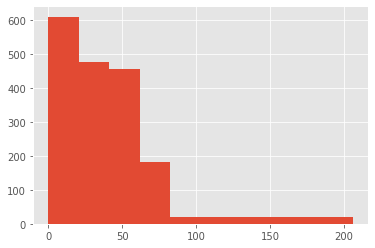

In [969]:
#understand distribution of course id across dataset using a histogram
plt.hist(students_df.courseId)

(array([185., 150., 287., 156., 191., 148., 193., 232., 167., 140.]),
 array([  0. ,  29.7,  59.4,  89.1, 118.8, 148.5, 178.2, 207.9, 237.6,
        267.3, 297. ]),
 <a list of 10 Patch objects>)

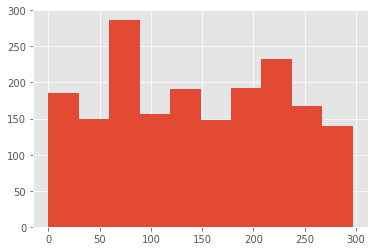

In [970]:
#understand distribution of student id across dataset using a histogram
plt.hist(students_df.studentId)

## Student Level Analysis

In [971]:
students_df.head()

,studentId,courseId,progress
0,61,72,0.11
1,71,73,0.14
2,4,2,0.10
3,16,3,0.02
4,40,4,0.05


In [972]:
#see the number of students that have watched course 73
students_df[students_df.courseId == 73]

,studentId,courseId,progress
1,71,73,0.14
226,102,73,0.95
1812,0,73,0.09
1813,12,73,0.03
1814,34,73,0.35
1815,61,73,0.05
1816,64,73,0.01
1817,70,73,0.05
1818,76,73,0.02
1819,102,73,0.02


In [973]:
#build a cross-tabulation table that shows the frequency with which certain groups of data appear
#show which courses a student has watched
pd.crosstab(students_df.studentId,students_df.courseId)

courseId,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
studentId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [974]:
#count the amount of times a studentId appears in the dataset
#helps us understand who watches the most content
students_df.groupby('studentId').size()

studentId
0       8
1       3
2       1
3       5
4      33
5       3
6       2
7       1
8       3
9       1
10     14
11      2
12     44
13     11
14      7
15      2
16     12
17      1
18      4
19      1
20      3
21      8
22      1
23      6
24      3
25      1
26      1
27      1
28      1
29      2
30      2
31      2
32      1
33      6
34      1
35      1
36      1
37      5
38      2
39      2
40     21
41      1
42     25
43      6
44      2
45      9
46      3
47      1
48     19
49      2
50      3
51      4
52      6
53      3
54      1
55      3
56      4
57     10
58      1
59      3
60      7
61     50
62      4
63      5
64     24
65      1
66     15
67      6
68      3
70     25
71     29
72     14
73      4
74      1
75      5
76     29
77      2
78      4
79      6
80      1
81      9
82      2
83      7
84      7
85     17
86      1
87      2
88      3
89      4
90      2
91      1
100     5
101    21
102    10
103     8
104     7
105     2
106     9
107     2


In [975]:
#print rows for a particular student (ie student 61) - show the courses they've watched
students_df.loc[students_df['studentId'] == 61]

,studentId,courseId,progress
0,61,72,0.11
5,61,5,0.43
14,61,1,0.04
32,61,4,0.07
45,61,5,0.08
69,61,21,0.97
113,61,10,0.04
148,61,15,0.02
207,61,54,0.24
371,61,5,0.74


## Course Level Analysis

In [976]:
#count the amount of times a courseId appears in the dataset
#see which courses are the most popular
students_df.groupby('courseId').size()

courseId
0        1
1        2
2        3
3       10
4        4
5       85
6        5
7        6
8        6
9        7
10       8
11      39
12      54
13      36
14      28
15      15
16      23
17     154
18      58
19      39
20      26
21      15
22       9
23      19
24     105
25       9
26      27
27       4
28      16
29      17
30      13
31      11
32      29
33      34
34      14
35      10
36      17
37      10
38      14
39      68
40      32
41       4
42       4
43       9
44       9
45      32
46       6
47      17
48      47
49       3
50      68
51       3
52      11
53      21
54      13
55       3
56      25
57      10
58     129
59       9
60      29
61       8
62      11
63      27
64       6
65       6
66      15
67       9
68      10
69      23
70      11
71      15
72       2
73      27
74      13
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
9

In [977]:
#print rows for a particular course ; show the students that have watched it
students_df.loc[students_df['courseId'] == 5]

,studentId,courseId,progress
5,61,5,0.43
18,123,5,0.22
33,70,5,0.80
45,61,5,0.08
360,4,5,0.05
361,10,5,0.03
362,12,5,0.87
363,14,5,0.01
364,21,5,0.06
365,40,5,0.87


## Data Transformation

In [978]:
def get_list_of_categories(courses):
    category_list = []
    
    for category in courses.categories.str.split('|'):
        for name in category:
            if name not in category_list: 
                category_list.append(name.strip())
            
    return category_list
    

In [979]:
def get_column_name_list(category_list):
    column_name = []
    
    for category in category_list:
        column_name.append('avg_' + category.strip() + '_watch')
      
    return column_name

In [980]:
#category watch time across ALL students across ALL categories
def get_all_category_watch_time(students, courses):
    category_progress = pd.DataFrame(columns = ['studentId'])
    category_list = get_list_of_categories(courses)
    column_names = get_column_name_list(category_list)
    
    #add studentId to list of columns
    column_names.insert(0,'studentId')
    
    for category in category_list:        
        course_categories = courses[courses['categories'].str.contains(category)]
        
        #determine the average watch time for the given category; retain the studentId
        avg_watch_time_per_user = students[students['courseId'].isin(course_categories['courseId'])].loc[:, ['studentId', 'progress']].groupby(['studentId'])['progress'].mean().round(2).reset_index()      
    
        #merge the progress for the given catetgory with the prior categories
        category_progress = category_progress.merge(avg_watch_time_per_user, on='studentId', how='outer')
            
    category_progress.columns = column_names
    return category_progress
    
# Calculate the average rating all categories per user
category_watch_time_df = get_all_category_watch_time(students_df, courses_df)
category_watch_time_df 

,studentId,avg_AWS_watch,avg_Security_watch,avg_Cloud_watch,avg_Serverless_watch,avg_Operations_watch,avg_GCP_watch,avg_ML_watch,avg_AI_watch,avg_Python_watch,...,avg_Containers_watch,avg_Docker_watch,avg_Azure_watch,avg_Architecture_watch,avg_Kubernetes_watch,avg_Storage_watch,avg_Container_watch,avg_Linux_watch,avg_SysAdmin_watch,avg_Serverless_watch
0,0,0.52,NaN,0.63,0.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.09
1,1,0.50,NaN,0.14,0.23,0.85,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23
2,2,0.25,NaN,NaN,NaN,NaN,NaN,0.25,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.99,0.98,0.74,NaN,NaN,0.22,NaN,NaN,NaN,...,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.24,0.03,0.32,0.09,0.23,0.09,0.03,0.22,NaN,...,0.03,0.05,0.82,NaN,NaN,0.04,0.03,0.20,0.20,0.09
5,5,0.05,NaN,0.02,NaN,0.02,NaN,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0.36,NaN,0.36,NaN,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.51,NaN,0.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.43,0.27,0.58,NaN,0.02,NaN,0.06,0.06,0.15,...,NaN,NaN,0.02,NaN,NaN,NaN,NaN,0.04,0.06,NaN


In [981]:
#category watch time for a SINGLE student
#print rows for a particular student (ie student 61) - show the courses they've watched
category_watch_time_df.loc[category_watch_time_df['studentId'] == 61]

,studentId,avg_AWS_watch,avg_Security_watch,avg_Cloud_watch,avg_Serverless_watch,avg_Operations_watch,avg_GCP_watch,avg_ML_watch,avg_AI_watch,avg_Python_watch,...,avg_Containers_watch,avg_Docker_watch,avg_Azure_watch,avg_Architecture_watch,avg_Kubernetes_watch,avg_Storage_watch,avg_Container_watch,avg_Linux_watch,avg_SysAdmin_watch,avg_Serverless_watch
46,61,0.24,0.06,0.32,0.31,0.13,0.27,0.16,0.16,0.05,...,0.45,0.52,0.33,NaN,0.21,0.04,0.4,0.07,0.07,0.31


In [982]:
#replace NaN with 0
category_watch_time_df = category_watch_time_df.fillna(0)
category_watch_time_df

,studentId,avg_AWS_watch,avg_Security_watch,avg_Cloud_watch,avg_Serverless_watch,avg_Operations_watch,avg_GCP_watch,avg_ML_watch,avg_AI_watch,avg_Python_watch,...,avg_Containers_watch,avg_Docker_watch,avg_Azure_watch,avg_Architecture_watch,avg_Kubernetes_watch,avg_Storage_watch,avg_Container_watch,avg_Linux_watch,avg_SysAdmin_watch,avg_Serverless_watch
0,0,0.52,0.00,0.63,0.09,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.09
1,1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
2,2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,0.24,0.03,0.32,0.09,0.23,0.09,0.03,0.22,0.00,...,0.03,0.05,0.82,0.00,0.00,0.04,0.03,0.20,0.20,0.09
5,5,0.05,0.00,0.02,0.00,0.02,0.00,0.00,0.08,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,7,0.36,0.00,0.36,0.00,0.36,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8,0.51,0.00,0.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,9,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,10,0.43,0.27,0.58,0.00,0.02,0.00,0.06,0.06,0.15,...,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.06,0.00


In [983]:
#remove student id from dataframe
category_watch_time_list = category_watch_time_df.drop(['studentId'], axis=1)

# Training

In [984]:
category_watch_time_list

,avg_AWS_watch,avg_Security_watch,avg_Cloud_watch,avg_Serverless_watch,avg_Operations_watch,avg_GCP_watch,avg_ML_watch,avg_AI_watch,avg_Python_watch,avg_Programming_watch,...,avg_Containers_watch,avg_Docker_watch,avg_Azure_watch,avg_Architecture_watch,avg_Kubernetes_watch,avg_Storage_watch,avg_Container_watch,avg_Linux_watch,avg_SysAdmin_watch,avg_Serverless_watch
0,0.52,0.00,0.63,0.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.09
1,0.50,0.00,0.14,0.23,0.85,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
2,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.99,0.98,0.74,0.00,0.00,0.22,0.00,0.00,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.24,0.03,0.32,0.09,0.23,0.09,0.03,0.22,0.00,0.18,...,0.03,0.05,0.82,0.00,0.00,0.04,0.03,0.20,0.20,0.09
5,0.05,0.00,0.02,0.00,0.02,0.00,0.00,0.08,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.36,0.00,0.36,0.00,0.36,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.51,0.00,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.43,0.27,0.58,0.00,0.02,0.00,0.06,0.06,0.15,0.22,...,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.06,0.00


In [985]:
category_watch_time_list.shape

(268, 29)

In [986]:
# Turn our dataset into a list
category_watch_time_list = category_watch_time_list.values
print(category_watch_time_list)

[[0.52 0.   0.63 ... 0.   0.   0.09]
 [0.5  0.   0.14 ... 0.   0.   0.23]
 [0.25 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [987]:
# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find 20 clusters
km = KMeans(n_clusters=20, random_state=0)

# Use fit_predict to cluster the dataset
# Returns a cluster prediction for each student / ie cluster labels
predictions = km.fit_predict(category_watch_time_list)

print(predictions)
print("-------")
print(type(predictions))
print(predictions.shape)
print(category_watch_time_list.shape)

[19  1  0 19  4  0  0 19 12 10  0  6  9  5  0  0  8 19  0 19 10  0  0 19
  0  8  3  0  0  0 19  0 19  0  2  6  4 11 12 19  6  8 10  3  6  1 12  0
  6  4  6 18  1  0 12 12  0  5  6 12  0  3  3  5  5  5 10 11  0 19  0 18
 17 18  0 12  5 19  1 14  0  0  0 19 12 19 12  0  0  1  2  3 12  8  0 11
  0 18  4  4  0  0  4 19 12  8  8  0  5 12  0  8  0 19  0  2 15  3 19  8
  8  0  5  0  6 19  3  0  3  0  0 19  0 19  3 19  0  3  8  2  1  4 12  5
  0 12  3  8  1 18  5 18 12 12  6 19  0  3  0 12  0 19 12 11 19 18 18  0
 19  0 12  8 12  0 19  1 11  8  3  0 12 12  1  1  0  3  0  2  0  5  0 12
  3  0 12 16 15  5  0  6  6 13  0 19 19  0  8  1 12  5  3  3 18  3  0  3
  0  0  0  3  0  0 18  0  0  3  3  3  0 18  3  3  3  3  0  3  3  3  0  0
  0  0  3  0  0  0  0  7  0  7  0  7  0  0  0  7  0  0  7  0  0  7  0  0
  7  0  0  0]
-------
<class 'numpy.ndarray'>
(268,)
(268, 29)


## Map Student ID to Cluster Number

In [988]:
#convert numpy array to dataframe and give column name of cluster
cluster_df = pd.DataFrame(data=predictions)
cluster_df.columns = ['assigned_cluster']
cluster_df

,assigned_cluster
0,19
1,1
2,0
3,19
4,4
5,0
6,0
7,19
8,12
9,10


In [989]:
print("The shape is-->", cluster_df.shape)
print("The shape is-->", category_watch_time_df.shape)

The shape is--> (268, 1)
The shape is--> (268, 30)


### Now that we understand which cluster a user is assigned to, we can recommend courses to this student based on their assigned group (ie cluster)

In [990]:
# merge data to see the assigned cluster for student ID and drop unnecessary columns
student_cluster_df = pd.DataFrame(columns = ['studentId', 'assigned_cluster'])
student_cluster_df = pd.concat([cluster_df, category_watch_time_df], axis=1)
student_cluster_df = student_cluster_df[student_cluster_df.columns[student_cluster_df.columns.isin(['studentId', 'assigned_cluster'])]]
student_cluster_df


,assigned_cluster,studentId
0,19,0
1,1,1
2,0,2
3,19,3
4,4,4
5,0,5
6,0,7
7,19,8
8,12,9
9,10,10


# Cluster Analysis

In [991]:
#count the amount of times a cluster appears in the dataset
student_cluster_df.groupby('assigned_cluster').size()

assigned_cluster
0     90
1     11
2      5
3     31
4      7
5     13
6     11
7      7
8     14
9      1
10     4
11     5
12    25
13     1
14     1
15     2
16     1
17     1
18    11
19    27
dtype: int64

## Plot Clusters

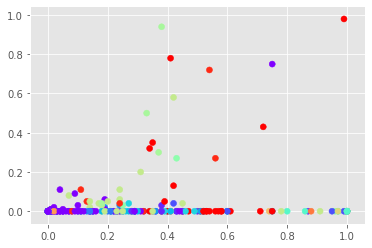

In [992]:
#plot the data
plt.scatter(category_watch_time_list[:,0],category_watch_time_list[:,1], c=km.labels_, cmap='rainbow')

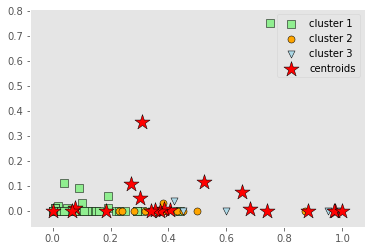

In [993]:
# visualize the clusters that k-means identified in the dataset together with the cluster centroids. 
# These are stored under the cluster_centers_ attribute of the fitted KMeans object
# plot the 3 clusters

plt.scatter(
    category_watch_time_list[predictions == 0, 0], category_watch_time_list[predictions == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    category_watch_time_list[predictions == 1, 0], category_watch_time_list[predictions == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    category_watch_time_list[predictions == 2, 0], category_watch_time_list[predictions == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Explore Cluster # 6
At this point, we have clustered students into 20 clusters. With our K-mean clustering model, we can produce a list of all students and which cluster they belong to. So, we can take a specific cluster and study the student characteristics along known dimensions.

Let’s study the student characteristics of cluster #6. 

In [994]:
#What are the commonalities between the students in cluster 6
#show students assigned to Cluster #6
student_cluster_df = student_cluster_df.loc[student_cluster_df['assigned_cluster'] == 5]

student_cluster_df.shape

(13, 2)

In [995]:
#Import the student data
students = pd.read_csv('data/students.csv')
courses = pd.read_csv('data/courses.csv')

#Get only the student progress records that appear in cluster 6
cluster6_students_df = students[students['studentId'].isin(student_cluster_df['studentId'])]

#print students
cluster6_students_df

,studentId,courseId,progress
43,266,15,3%
58,14,10,97%
76,81,28,3%
99,204,51,5%
175,14,22,100%
185,26,32,78%
214,73,61,2%
218,81,65,100%
337,266,184,2%
363,14,5,1%


In [996]:
#convert progress percentage string to numeric data
cluster6_students_df['progress'] = cluster6_students_df['progress'].str.rstrip('%').astype('float') / 100.0

In [997]:
#limit to only courses that are above a 90% watch rate
cluster6_students_df = cluster6_students_df.loc[cluster6_students_df['progress'] > .90]

In [998]:
print(cluster6_students_df.shape)

(15, 3)


In [999]:
cluster6_students_df

,studentId,courseId,progress
58,14,10,0.97
175,14,22,1.00
218,81,65,1.00
385,104,5,0.98
866,80,26,1.00
1054,204,45,1.00
1247,277,56,1.00
1277,14,24,1.00
1340,204,24,1.00
1360,266,24,1.00


### Explore categories across clusters

In [1000]:
#Get the course categories for courses watched (course Id) by students in cluster 

cluster6_courses_watched_df = courses[courses['courseId'].isin(cluster6_students_df['courseId'])]

In [1001]:
#Get rid of NaN
cluster6_courses_watched_df.dropna(subset=['categories'], inplace=True)

In [1002]:
category_list = get_list_of_categories(cluster6_courses_watched_df)
print("The amount of categories for Cluster 6: ", len(category_list))
print("The categories in Cluster 6", category_list)

The amount of categories for Cluster 6:  8
The categories in Cluster 6 ['AWS', 'Certification', 'Cloud', 'Development', 'Serverless', 'Programming', 'Database', 'AI']


In [1003]:
#The amount of possible categories
courses = pd.read_csv('data/courses.csv')
courses.dropna(subset=['categories'], inplace=True)
print("The amount of total possible categories: ", len(get_list_of_categories(courses)))

The amount of total possible categories:  29
